<a href="https://colab.research.google.com/github/Sazzads/ANN/blob/main/implement_of_FCNN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [6]:
#about dataset
X,y=datasets.make_moons(n_samples=1000,noise=0.1,random_state=0)
y.shape,X.shape

((1000,), (1000, 2))

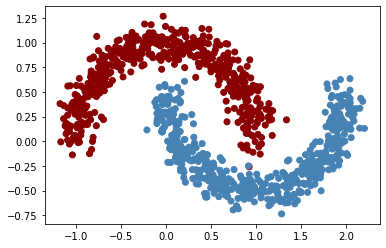

In [9]:
#visualize
colors=['steelblue' if label==1 else 'darkred' for label in y]
plt.scatter(X[:,0],X[:,1],color=colors)

In [11]:
#import "sequential" from 'keras.models'
from keras.models import Sequential

#import Dense from keras.layers
from keras.layers import dense_attention

#initalize the constructor
model=Sequential()

#add an input layer
model.add(Dense(5,activation='relu',input_shape=(2,)))
    
 
#add one hidden layer
model.add(Dense(5,activation='relu'))

#add an output layer
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [14]:
sgd=SGD(lr=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [29]:
history = model.fit(X[:500],y[:500], verbose=1, epochs=4000, shuffle=True)

Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.8860
Epoch 1502/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.8880
Epoch 1503/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9000
Epoch 1504/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.8980
Epoch 1505/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.8940
Epoch 1506/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.8880
Epoch 1507/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.8980
Epoch 1508/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.8960
Epoch 1509/4000
16/16 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.8940
Epoch 1510/4000
16/16 [===============

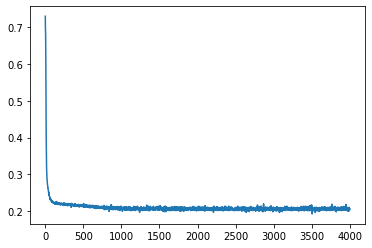

In [33]:
plt.plot(history.history['loss'])

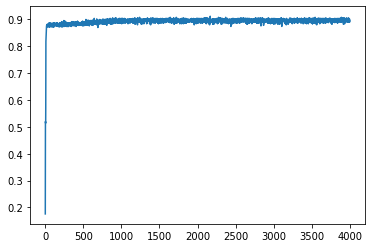

In [35]:
plt.plot(history.history['accuracy'])


In [46]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
  
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf0d6254d0>)

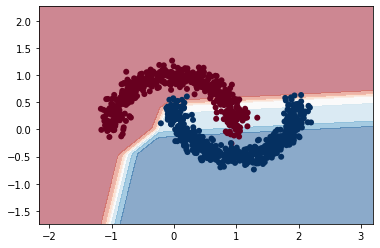

In [47]:
plot_decision_boundary(X, y, model, cmap='RdBu')